<a href="https://colab.research.google.com/github/natdebandi/hate_speech_ar/blob/main/Pruebas_GPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP final - reconocimiento de discursos discriminatorios en Twitter
## (3) Entrenamiento y finetuning de modelos GPT para clasificación

**Natalia Dedandi**

Se quiere entrenar un modelo GPT para clasificación de discursos de odio.

Para ello se quiere adaptar la forma en que se trabaja porque GPT esta entrenado para completar o responder un texto, por lo tanto queremos que esa respuesta sea binaria: odioso  no odioso.



La documentación de la API se encuentra aqui:

https://platform.openai.com/docs/api-reference/introduction

Este articulo contiene algunos detalles interesantes para los parámetros

https://jerichosiahaya.medium.com/openai-gpts-chat-completion-api-parameters-101-d074b23027ce


La nueva API de GPT modificó la forma de acceder para pasar de completar a chat. Sin embargo se puede obtener el mismo resultado. Documentación sobre ello está aqui:

https://help.openai.com/en/articles/7042661-moving-from-completions-to-chat-completions-in-the-openai-api


Guia para finetuning:

https://medium.com/@garethcull/fine-tuning-ai-models-a-practical-guide-for-beginners-dc313b2e0f76

In [ ]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.8/328.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.5 MB/s eta 0:00:00


In [ ]:
!pip install datasets seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

In [ ]:
import json
from openai import OpenAI
import os
from google.colab import userdata
#seteo la KEY
os.environ['OPENAI_API_KEY'] = userdata.get('openIA_key')




In [ ]:
#creo el cliente OPENAI con mi usuario y proyecto
client = OpenAI(
  organization='org-1uHjwiaB3OlPzoxfVzhqOSzs',
  project='proj_2fII7izwVGgYaERNNKhhMx4l',
)

Creo una función para que GPT 4 determine si es odioso o no el TW

Basado en este ejemplo:
https://community.openai.com/t/i-am-facing-issue-in-running-sentiment-analysis-api-with-openai-while-i-have-fullfilled-all-the-basic-code-which-i-got-from-google-bard/570554


In [ ]:

def sentiment_analysis(text):

    # Call the OpenAI API to generate a response
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "You are trained to analyze and detect the sentiment of the given text. Only hateful or not hateful is allowed. The answer should be in spanish"},
            {"role": "user", "content": text}
        ],
        max_tokens=20,  # Limit response to a single word
        temperature=0  # Keep response consistent
    )

    # Extract the sentiment from the response
    sentiment = response.choices[0].message.content.strip().lower()

    return sentiment

# Example usage
input_text = "Las personas chinas son todas sucias"
sentiment = sentiment_analysis(input_text)
print(input_text, "Sentiment is:", sentiment)



Las personas chinas son todas sucias Sentiment is: odioso


In [ ]:
input_text = "Que bello dia es hoy"
sentiment = sentiment_analysis(input_text)
print(input_text, "Sentiment is:", sentiment)

Que bello dia es hoy Sentiment is: no odioso


Aplico el setiment analysis con GPT a un extracto de mis datos para ver como sale

In [ ]:
from datasets import load_dataset
import pandas as pd

ds1 = load_dataset("piuba-bigdata/contextualized_hate_speech")


In [ ]:
#tomo una muestra de 100 TW random
df_sample = pd.DataFrame(ds1['train'])

                         #.select_columns(["text","context_tweet","HATEFUL"]))

df_sample= df_sample.sample(n=100, random_state=0)
df_sample

,id,title,text,context_tweet,HATEFUL,body,CALLS,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL
24752,348243,Nancy Pazos reveló por qué decidió que su mamá...,@usuario En toda desgracia siempre hay benefic...,Nancy Pazos reveló por qué decidió que su mamá...,0,"Nancy Pazos contó, este lunes a primera hora, ...",0,0,0,0,0,0,0,0,0
3004,365241,Opinan los especialistas: ¿por qué los jóvenes...,@usuario Hay q ser especialista para poder dar...,Opinan los especialistas: ¿por qué los jóvenes...,0,La historia argentina está signada por la inmi...,0,0,0,0,0,0,0,0,0
29851,368623,"Jorge Lanata: ""Alberto Fernández está funciona...",@usuario Puede hablar el gordo drogadicto toda...,"Lanata: ""Hoy Alberto está funcionando como el ...",1,"""Lo que más me preocupa es que el Gobierno no ...",0,0,0,0,0,0,1,1,0
21119,380655,"Tren Roca: no tenía permiso para viajar, insul...",@usuario Medios de mierda deja de vender humo ...,#VIDEO Tren Roca: no tenía permiso para circul...,0,Un violento episodio habría tenido lugar el pa...,0,0,0,0,0,0,0,0,0
26686,351838,Alberto Fernández criticó a Susana Giménez y d...,"@usuario A ver, Tinelli se cago en la cuarente...",🔴 AHORA | Alberto Fernández criticó a Susana G...,0,"Alberto Fernández apoyó a Marcelo Tinelli, con...",0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20822,357740,"Elisa Carrió: ""Cristina no fue presa porque el...","@usuario Está mal. Defender la República, no e...",Elisa Carrió y un mensaje a la interna de Camb...,0,La ex diputada nacional y líder de la Coalició...,0,0,0,0,0,0,0,0,0
9675,396931,El fuerte reclamo de Milagro Sala al Gobierno ...,@usuario epa epa qué pasa milagritos no te est...,El fuerte reclamo de Milagro Sala al Gobierno ...,0,A horas de cumplir cinco años de prisión por v...,0,0,0,0,0,0,0,0,0
13262,376770,Brucelosis en China: se escapó una bacteria de...,@usuario ESTOS CHINOS HDMP QUIEREN VOLTEAR EL ...,Se escapó una bacteria de un laboratorio en Ch...,1,Más de 3.000 personas en el noroeste de China ...,0,0,0,1,0,0,0,0,0
33916,383394,Coronavirus en Argentina: Cuba busca intercamb...,@usuario Tenemos gente a la que les jode que v...,Coronavirus en Argentina: Cuba busca intercamb...,0,Cuba suele cobrar el servicio de sus médicos e...,0,0,0,0,0,0,0,0,0


Habria que limpiar los textos. Aqui un ejemplo:
https://github.com/alvaroruizp/spanish-twitter-sentiment-analyzer/blob/main/Building%20a%20Twitter%20sentiment%20analyzer.ipynb

Al ver algunos TW tal vez agregarle en GPT el TW orignal de contexto podría mejorar mucho la detección, sin necesidad de hacer finetuning.

In [ ]:
#import numpy as np
# Applying the condition using apply and lambda
#df_train_sample['completion'] = df_train_sample['completion'].apply(lambda x: 'Hateful' if x == 1 else 'neutral')


### Aplicacion de GPT binario sin contexto



In [ ]:
#me quedo con las columnas par
df_hateful=df_sample[['text', 'HATEFUL']]
df_hateful

Le aplico al tweet la funcion de sentimiento. Solo analizo el tweet sin contexto

In [ ]:
  df_hateful['sentiment'] = df_hateful['text'].apply(sentiment_analysis)


<ipython-input-43-d957956e5165>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hateful['sentiment'] = df_hateful['text'].apply(sentiment_analysis)


In [ ]:
df_hateful.groupby(['sentiment']).size()


sentiment
hateful                          3
no es odioso.                    4
no es un comentario de odio.     2
no es un mensaje de odio.        2
no odioso                       45
no odioso.                       7
odioso                          37
dtype: int64

En pruebas previas con solo 50 casos random había aplicado las etiquetas odioso y no odioso bien. En este caso amplio las opciones.

In [ ]:
import numpy as np

## ajustar los valores y crear una variable binaria entera 1 y 0
df_hateful['sentiment_bin'] = df_hateful['sentiment'].apply(lambda x: 1 if (x == 'odioso' or x=='hateful') else 0)
#df_hateful['sentiment_bin'] = df_hateful['sentiment'].apply(lambda x: 1 if x == 'odioso' else 0)
df_hateful.groupby(['sentiment_bin']).size()



<ipython-input-54-ea643e480319>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hateful['sentiment_bin'] = df_hateful['sentiment'].apply(lambda x: 1 if (x == 'odioso' or x=='hateful') else 0)


sentiment_bin
0    60
1    40
dtype: int64

<ipython-input-55-14ca81176c55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_hateful, x='HATEFUL', y='sentiment_bin', inner='stick', palette='Dark2')


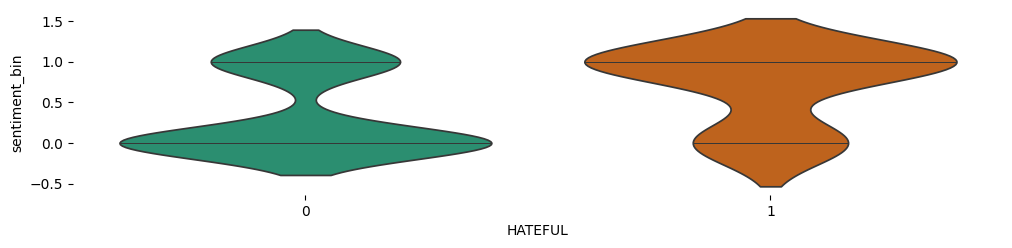

In [ ]:
# @title sentiment_column vs HATEFUL

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_hateful['sentiment_bin'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_hateful, x='HATEFUL', y='sentiment_bin', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def compare_model_predictions(y_true, y_pred, problem_type='classification'):
    metrics = {}

    if problem_type == 'classification':
        metrics['Accuracy'] = accuracy_score(y_true, y_pred)
        metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
        metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
        metrics['f1'] = f1_score(y_true, y_pred, average='weighted')
        print('metrix')
        print(metrics)

In [ ]:
#df_train_sample

#import numpy as np
# Applying the condition using apply and lambda
#df_train_sample['sentiment_bin'] = df_train_sample['sentiment_column'].apply(lambda x: 1 if x == 'odioso' else 0)

In [ ]:
metrics=compare_model_predictions(df_hateful['HATEFUL'],df_hateful['sentiment_bin'])

metrix
{'Accuracy': 0.67, 'Precision': 0.8118333333333332, 'Recall': 0.67, 'f1': 0.7100404858299595}


###  Aplico el mismo esquema pero le agrego al TW el Tweet de contexto.

In [ ]:
#me quedo con las columnas par
df_hateful_context=df_sample[['text','context_tweet', 'HATEFUL']]
df_hateful_context['context_text']= df_hateful_context['context_tweet'] + '[SEP]' + ['text']
df_hateful_context


<ipython-input-61-51eb4cff208d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hateful_context['context_text']= df_hateful_context['context_tweet'] + '[SEP]' + ['text']


,text,context_tweet,HATEFUL,context_text
24752,@usuario En toda desgracia siempre hay benefic...,Nancy Pazos reveló por qué decidió que su mamá...,0,Nancy Pazos reveló por qué decidió que su mamá...
3004,@usuario Hay q ser especialista para poder dar...,Opinan los especialistas: ¿por qué los jóvenes...,0,Opinan los especialistas: ¿por qué los jóvenes...
29851,@usuario Puede hablar el gordo drogadicto toda...,"Lanata: ""Hoy Alberto está funcionando como el ...",1,"Lanata: ""Hoy Alberto está funcionando como el ..."
21119,@usuario Medios de mierda deja de vender humo ...,#VIDEO Tren Roca: no tenía permiso para circul...,0,#VIDEO Tren Roca: no tenía permiso para circul...
26686,"@usuario A ver, Tinelli se cago en la cuarente...",🔴 AHORA | Alberto Fernández criticó a Susana G...,0,🔴 AHORA | Alberto Fernández criticó a Susana G...
...,...,...,...,...
20822,"@usuario Está mal. Defender la República, no e...",Elisa Carrió y un mensaje a la interna de Camb...,0,Elisa Carrió y un mensaje a la interna de Camb...
9675,@usuario epa epa qué pasa milagritos no te est...,El fuerte reclamo de Milagro Sala al Gobierno ...,0,El fuerte reclamo de Milagro Sala al Gobierno ...
13262,@usuario ESTOS CHINOS HDMP QUIEREN VOLTEAR EL ...,Se escapó una bacteria de un laboratorio en Ch...,1,Se escapó una bacteria de un laboratorio en Ch...
33916,@usuario Tenemos gente a la que les jode que v...,Coronavirus en Argentina: Cuba busca intercamb...,0,Coronavirus en Argentina: Cuba busca intercamb...


In [ ]:
  df_hateful_context['sentiment'] = df_hateful_context['context_text'].apply(sentiment_analysis)

<ipython-input-62-5a1406d62111>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hateful_context['sentiment'] = df_hateful_context['context_text'].apply(sentiment_analysis)


In [ ]:
df_hateful_context.groupby(['sentiment']).size()

sentiment
hateful                    1
no es odioso.             12
no es un texto odioso.     1
no odioso                 81
no odioso.                 5
dtype: int64

In [ ]:
## ajustar los valores y crear una variable binaria entera 1 y 0
df_hateful_context['sentiment_bin'] = df_hateful_context['sentiment'].apply(lambda x: 1 if (x == 'odioso' or x=='hateful') else 0)
#df_hateful['sentiment_bin'] = df_hateful['sentiment'].apply(lambda x: 1 if x == 'odioso' else 0)
df_hateful_context.groupby(['sentiment_bin']).size()


<ipython-input-64-4a851222dd6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hateful_context['sentiment_bin'] = df_hateful_context['sentiment'].apply(lambda x: 1 if (x == 'odioso' or x=='hateful') else 0)


sentiment_bin
0    99
1     1
dtype: int64

In [ ]:
df_hateful_context.groupby(['HATEFUL']).size()

HATEFUL
0    83
1    17
dtype: int64

In [ ]:
metrics=compare_model_predictions(df_hateful_context['HATEFUL'],df_hateful_context['sentiment_bin'])

metrix
{'Accuracy': 0.82, 'Precision': 0.6874747474747476, 'Recall': 0.82, 'f1': 0.7479120879120879}


<ipython-input-69-c67974d56a4d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_hateful_context, x='HATEFUL', y='sentiment_bin', inner='stick', palette='Dark2')


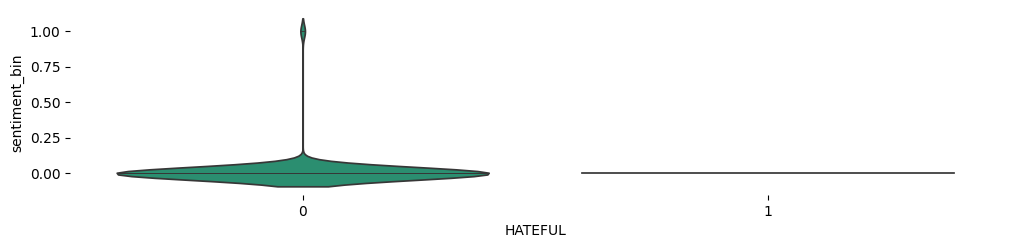

In [ ]:
figsize = (12, 1.2 * len(df_hateful_context['sentiment_bin'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_hateful_context, x='HATEFUL', y='sentiment_bin', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

USAR GPT PARA CLASIFICACION DE MUCHAS ETIQUETAS

In [ ]:
df_sample
df_sample[df_sample['HATEFUL'] == 1]



,id,title,text,context_tweet,HATEFUL,body,CALLS,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL
29851,368623,"Jorge Lanata: ""Alberto Fernández está funciona...",@usuario Puede hablar el gordo drogadicto toda...,"Lanata: ""Hoy Alberto está funcionando como el ...",1,"""Lo que más me preocupa es que el Gobierno no ...",0,0,0,0,0,0,1,1,0
13539,385786,"Escándalo en Italia por los ""cementerios de ab...","@usuario Cual es el problema, ahora las aborte...",Escándalo en Italia por los “cementerios de ab...,1,"""No te preocupes aunque no te hayas apuntado p...",0,1,0,0,0,0,0,0,0
27618,364330,"""Me quiero matar"", la carta del preso que qued...","@usuario Jajaja... perdón, poooobre","""Me quiero matar"", la carta del preso que qued...",1,María miraba una película en Netflix cuando se...,0,0,0,0,0,0,0,0,1
11566,351116,Florencia Peña se diferenció de los argentinos...,@usuario Petera vieja.,Florencia Peña se diferenció de los argentinos...,1,La hostilidad del actual mercado laboral y el ...,0,1,0,0,0,0,0,1,0
26240,377589,Roberto Baradel dijo que las protestas policia...,@usuario Cállese hombre horrible,Roberto Baradel dijo que las protestas policia...,1,El gremialista Roberto Baradel aseguró este ma...,0,0,0,0,0,0,0,1,0
33884,371661,"Juan Grabois: ""Hay una oleada de toma de tierr...",@usuario Que bueno más bolitas y peruanos haci...,"Juan Grabois: ""Hay una oleada de toma de tierr...",1,"Juan Grabois: ""Hay una oleada de toma de tierr...",0,0,0,1,0,0,0,0,0
16279,386019,El ex presidente uruguayo José Mujica anunció ...,@usuario Está agotado el tupamaro! La política...,El ex presidente uruguayo José Mujica anunció ...,1,El ex presidente uruguayo José Mujica (2010-20...,0,0,0,0,0,1,0,1,0
19772,345395,Coronavirus en China: la ciudad de Shenzhen pr...,@usuario habrá alguna manera de erradicar a es...,Coronavirus en China: la ciudad de Shenzhen pr...,1,"Shenzhen, una de las mayores ciudades de China...",1,0,0,1,0,0,0,0,0
30974,364205,"Diego Maradona les responde a sus hijas: ""Dalm...","@usuario Hablo el ejemplo de padre, falopero, ...","Diego Maradona les responde a sus hijas: ""Dalm...",1,"Mañana de domingo, casi mediodía. El más ilust...",0,0,0,0,0,0,1,1,0
34018,366472,"Juana Viale: ""Alberto Fernández parece más un ...",@usuario Tira goma..,"Juana Viale: ""Fernández parece más un vocero q...",1,"La indignación de Juana Viale: ""Siento que la ...",0,1,0,0,0,0,0,0,0


In [ ]:


def sentiment_analysis_multiple(text):

    # Call the OpenAI API to generate a response
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": f"""
            You must classify a text with one or more of the following labels: Label WOMEN discrimination against women, label LGBTI gender discrimination, specifically against gays, lesbians or transsexuals,
            label RACISM is racism, or discrimination against people according to their skin color,label CLASS is discrimination for being poor or living in a marginal or poor place,
             label POLITICS is hatred of politicians, label DISABLED is discrimination against people with disabilities, label APPEARENCE is discrimination against people because
             of their physical appearance, specifically fatphobia, label CRIMINAL is discrimination against people because of a criminal record or links to criminality and label CALLS is hateful text that incites violence
             If the text is not hatefull indicate label NOT HATEFUL"""},
            {"role": "user", "content": text}
        ],
        max_tokens=100,  # Limit response to a single word
        temperature=0  # Keep response consistent
    )

    # Extract the sentiment from the response
    sentiment = response.choices[0].message.content.strip().lower()

    return sentiment

# Example usage
input_text = "Que el EVO se vaya a su país"
sentiment = sentiment_analysis_multiple(input_text)
print(input_text, "Sentiment is:", sentiment)

Que el EVO se vaya a su país Sentiment is: label politics


In [ ]:
  df_multiple=df_sample
  df_multiple['sentiment'] = df_multiple['text'].apply(sentiment_analysis_multiple)

In [ ]:
 df_multiple

,id,title,text,context_tweet,HATEFUL,body,CALLS,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL,sentiment
24752,348243,Nancy Pazos reveló por qué decidió que su mamá...,@usuario En toda desgracia siempre hay benefic...,Nancy Pazos reveló por qué decidió que su mamá...,0,"Nancy Pazos contó, este lunes a primera hora, ...",0,0,0,0,0,0,0,0,0,not hateful
3004,365241,Opinan los especialistas: ¿por qué los jóvenes...,@usuario Hay q ser especialista para poder dar...,Opinan los especialistas: ¿por qué los jóvenes...,0,La historia argentina está signada por la inmi...,0,0,0,0,0,0,0,0,0,not hateful
29851,368623,"Jorge Lanata: ""Alberto Fernández está funciona...",@usuario Puede hablar el gordo drogadicto toda...,"Lanata: ""Hoy Alberto está funcionando como el ...",1,"""Lo que más me preocupa es que el Gobierno no ...",0,0,0,0,0,0,1,1,0,label appearance
21119,380655,"Tren Roca: no tenía permiso para viajar, insul...",@usuario Medios de mierda deja de vender humo ...,#VIDEO Tren Roca: no tenía permiso para circul...,0,Un violento episodio habría tenido lugar el pa...,0,0,0,0,0,0,0,0,0,label politics
26686,351838,Alberto Fernández criticó a Susana Giménez y d...,"@usuario A ver, Tinelli se cago en la cuarente...",🔴 AHORA | Alberto Fernández criticó a Susana G...,0,"Alberto Fernández apoyó a Marcelo Tinelli, con...",0,0,0,0,0,0,0,0,0,label: politics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20822,357740,"Elisa Carrió: ""Cristina no fue presa porque el...","@usuario Está mal. Defender la República, no e...",Elisa Carrió y un mensaje a la interna de Camb...,0,La ex diputada nacional y líder de la Coalició...,0,0,0,0,0,0,0,0,0,label not hateful
9675,396931,El fuerte reclamo de Milagro Sala al Gobierno ...,@usuario epa epa qué pasa milagritos no te est...,El fuerte reclamo de Milagro Sala al Gobierno ...,0,A horas de cumplir cinco años de prisión por v...,0,0,0,0,0,0,0,0,0,label not hateful
13262,376770,Brucelosis en China: se escapó una bacteria de...,@usuario ESTOS CHINOS HDMP QUIEREN VOLTEAR EL ...,Se escapó una bacteria de un laboratorio en Ch...,1,Más de 3.000 personas en el noroeste de China ...,0,0,0,1,0,0,0,0,0,label racism
33916,383394,Coronavirus en Argentina: Cuba busca intercamb...,@usuario Tenemos gente a la que les jode que v...,Coronavirus en Argentina: Cuba busca intercamb...,0,Cuba suele cobrar el servicio de sus médicos e...,0,0,0,0,0,0,0,0,0,label: politics


In [ ]:
df_multiple.groupby(['sentiment']).size()

sentiment
label appearance                      2
label calls                           3
label class                           3
label lgbti gender discrimination     1
label not hateful                    23
label politics                        9
label racism                          3
label women                           2
label: appearance                     3
label: calls                          3
label: class                          1
label: criminal                       3
label: not hateful                    5
label: politics                       6
not hateful                          33
dtype: int64

Asigno manualmente las posibles respuestas a etiquetas o y 1 de columnas de prediccion de cada etiqueta original

In [ ]:
ds1

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 36420
    })
    test: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 11343
    })
    dev: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 9106
    })
})

In [ ]:
import re

def word_in_text(word, text):
    # Use re.search() to find the word in the text
    pattern = r'\b{}\b'.format(re.escape(word))  # \b matches word boundaries
    match = re.search(pattern, text, flags=re.IGNORECASE)  # Ignore case for case-insensitive matching

    if match:
        return True
    else:
        return False

In [ ]:
## ajustar los valores y crear una variable binaria entera 1 y 0
df_multiple['CALLS_pred'] = df_multiple['sentiment'].apply(lambda x: 1 if word_in_text('calls',x) else 0)
df_multiple['WOMEN_pred'] = df_multiple['sentiment'].apply(lambda x: 1 if word_in_text('women',x) else 0)
df_multiple['LGBTI_pred'] = df_multiple['sentiment'].apply(lambda x: 1 if word_in_text('lgbti',x) else 0)
df_multiple['RACISM_pred'] = df_multiple['sentiment'].apply(lambda x: 1 if word_in_text('racism',x) else 0)
df_multiple['CLASS_pred'] = df_multiple['sentiment'].apply(lambda x: 1 if word_in_text('class',x) else 0)
df_multiple['POLITICS_pred'] = df_multiple['sentiment'].apply(lambda x: 1 if word_in_text('politics',x) else 0)
df_multiple['DISABLED_pred'] = df_multiple['sentiment'].apply(lambda x: 1 if word_in_text('disabled',x) else 0)
df_multiple['APPEARENCE_pred'] = df_multiple['sentiment'].apply(lambda x: 1 if word_in_text('appearance',x) else 0)
df_multiple['CRIMINAL_pred'] = df_multiple['sentiment'].apply(lambda x: 1 if word_in_text('criminal',x) else 0)


In [ ]:
#creo la columna de prediccion de odio general con la union de las etiquetas
df_multiple['HATEFUL_pred']= df_multiple[['CALLS_pred','WOMEN_pred','LGBTI_pred','RACISM_pred','CLASS_pred','POLITICS_pred','DISABLED_pred','APPEARENCE_pred','CRIMINAL_pred']].max(axis=1)

df_multiple.groupby(['HATEFUL_pred']).size()

HATEFUL_pred
0    61
1    39
dtype: int64

In [ ]:
compare_model_predictions(df_multiple['HATEFUL'],df_multiple['HATEFUL_pred'])

metrix
{'Accuracy': 0.66, 'Precision': 0.796309373686423, 'Recall': 0.66, 'f1': 0.700813492063492}


In [ ]:
ds1

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 36420
    })
    test: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 11343
    })
    dev: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 9106
    })
})

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss
from sklearn.preprocessing import MultiLabelBinarizer

# Example data (replace with your actual data)
y_true = [df_multiple['CALLS'], df_multiple['WOMEN'], df_multiple['LGBTI'], df_multiple['RACISM'], df_multiple['CLASS'], df_multiple['POLITICS'], df_multiple['DISABLED'], df_multiple['APPEARANCE'], df_multiple['CRIMINAL']]
y_pred = [df_multiple['CALLS_pred'], df_multiple['WOMEN_pred'], df_multiple['LGBTI_pred'], df_multiple['RACISM_pred'], df_multiple['CLASS_pred'], df_multiple['POLITICS_pred'], df_multiple['DISABLED_pred'], df_multiple['APPEARENCE_pred'], df_multiple['CRIMINAL_pred']]

# Convert labels to binary representation
mlb = MultiLabelBinarizer()
y_true_bin = mlb.fit_transform(y_true)
y_pred_bin = mlb.transform(y_pred)

# Accuracy
accuracy = accuracy_score(y_true_bin, y_pred_bin)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_true_bin, y_pred_bin, average='samples')
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_true_bin, y_pred_bin, average='samples')
print(f'Recall: {recall:.2f}')

# F1 score
f1 = f1_score(y_true_bin, y_pred_bin, average='samples')
print(f'F1 score: {f1:.2f}')




Accuracy: 0.78
Precision: 0.94
Recall: 0.94
F1 score: 0.93
